prepare data for CNN
* use the extracted corrdinate and area, using plt to resize the data

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import re

In [38]:
star_df = pd.read_csv("../coordinate_radius/ursa_minor_1.csv")
star_df = star_df.drop(columns=["Unnamed: 0"])
star_df

,x,y,r
0,249.0,66.0,4.222222
1,63.0,158.0,4.222222
2,287.0,68.0,1.000000
3,185.0,151.0,1.000000
4,124.0,167.0,1.000000
5,224.0,108.0,1.000000
6,123.0,203.0,1.000000
7,11.0,231.0,1.000000
8,284.0,216.0,1.000000
9,74.0,133.0,1.000000


/var/folders/cd/s7rvnz8129v27nvpxmvwn9hc0000gn/T/ipykernel_15680/2677778751.py:7: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), radius, color='white', alpha=1.0, edgecolor='none', zorder=10)


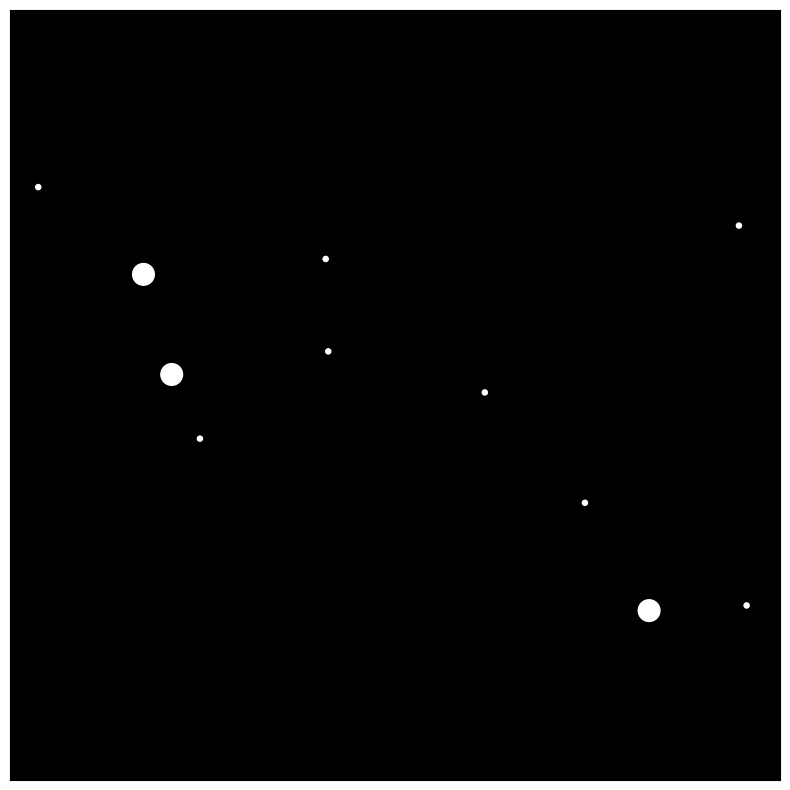

In [39]:
# Create a blank canvas for your sky image
sky_image = plt.figure(figsize=(10, 10), dpi=100)
ax = sky_image.add_subplot(111)

for index, row in star_df.iterrows():
    x, y, radius = row['x'], row['y'], row['r']
    circle = plt.Circle((x, y), radius, color='white', alpha=1.0, edgecolor='none', zorder=10)
    ax.add_artist(circle)

# Customize the appearance of the sky (e.g., background color)
ax.set_xlim(0, 300)
ax.set_ylim(0, 300)
ax.set_aspect('equal')
ax.set_facecolor('black')  # Set the background color to black (representing the night sky)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('../resize_image/ursa_minor_1.png', bbox_inches='tight', pad_inches=0, dpi=100)

In [50]:
input_dir = "../resize_image"
output_dir = "../"
image_size = (10, 10)
pixels = []
targets = []
for class_name in os.listdir(input_dir):
    if not class_name.endswith('.png'):
        continue
    class_path = os.path.join(input_dir, class_name)
    print(class_path)
    pattern = r"^(.*?)_\d+\.png$"
    match = re.match(pattern, class_name)
    if match:
        target = match.group(1)
    else:
        target = class_name
    targets.append(target)
    image = Image.open(class_path)
    image_array = np.array(image)
    pixels.append(image_array)

pixels = np.array(pixels)
targets = np.array(targets)

np.save(output_dir + "images.npy", pixels)
np.save(output_dir + "labels.npy", targets)

../resize_image/ursa_minor_1.png
